In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df['housing_median_age'] = scaler.fit_transform(df[['housing_median_age']])
df['total_rooms'] = scaler.fit_transform(df[['total_rooms']])
df['total_bedrooms'] = scaler.fit_transform(df[['total_bedrooms']])
df['population'] = scaler.fit_transform(df[['population']])
df['households'] = scaler.fit_transform(df[['households']])
df['median_income'] = scaler.fit_transform(df[['median_income']])
df['median_house_value'] = scaler.fit_transform(df[['median_house_value']])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,-114.47,34.40,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,-114.56,33.69,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,-114.57,33.64,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,-114.57,33.57,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,-124.27,40.69,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,-124.30,41.84,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,-124.30,41.80,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


In [ ]:
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.relu = nn.ReLU()
    self.layer1 = nn.Linear(6, 3)
    self.layer2 = nn.Linear(3, 3)
    self.layer3 = nn.Linear(3, 1)
    self.elu = nn.ELU()
    self.mish = nn.Mish()
    self.hard_tanh = nn.Hardtanh(y.min(), y.max())
  def forward(self, x):
    x = self.layer1(x)
    x = self.hard_tanh(x)
    x = self.layer2(x)
    x = self.mish(x)
    x = self.layer3(x)
    return x

model = NeuralNetwork()

In [ ]:
epochs = 1000
MSE = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(epochs):
  output = model(torch.tensor(X.values).float())
  loss = MSE(output, torch.tensor(y.values).float())
  print("Epoch: "+ str(epoch) + " Loss: " + str(loss))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([17000])) that is different to the input size (torch.Size([17000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Loss: tensor(0.0612, grad_fn=<MseLossBackward0>)
Epoch: 1 Loss: tensor(0.0610, grad_fn=<MseLossBackward0>)
Epoch: 2 Loss: tensor(0.0608, grad_fn=<MseLossBackward0>)
Epoch: 3 Loss: tensor(0.0606, grad_fn=<MseLossBackward0>)
Epoch: 4 Loss: tensor(0.0605, grad_fn=<MseLossBackward0>)
Epoch: 5 Loss: tensor(0.0603, grad_fn=<MseLossBackward0>)
Epoch: 6 Loss: tensor(0.0601, grad_fn=<MseLossBackward0>)
Epoch: 7 Loss: tensor(0.0599, grad_fn=<MseLossBackward0>)
Epoch: 8 Loss: tensor(0.0598, grad_fn=<MseLossBackward0>)
Epoch: 9 Loss: tensor(0.0596, grad_fn=<MseLossBackward0>)
Epoch: 10 Loss: tensor(0.0595, grad_fn=<MseLossBackward0>)
Epoch: 11 Loss: tensor(0.0593, grad_fn=<MseLossBackward0>)
Epoch: 12 Loss: tensor(0.0592, grad_fn=<MseLossBackward0>)
Epoch: 13 Loss: tensor(0.0591, grad_fn=<MseLossBackward0>)
Epoch: 14 Loss: tensor(0.0589, grad_fn=<MseLossBackward0>)
Epoch: 15 Loss: tensor(0.0588, grad_fn=<MseLossBackward0>)
Epoch: 16 Loss: tensor(0.0587, grad_fn=<MseLossBackward0>)
Epoch: 

In [ ]:
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_X = test_df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
test_y = test_df['median_house_value']

for index, row in test_df.iterrows():
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
  print(pred)

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3708], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3983], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3778], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3717], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3697], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBackward0>)
tensor([0.3932], grad_fn=<ViewBack

<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model(torch.tensor(row[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]).float())
<ipython-input-77-dd2a3ec2c0dd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

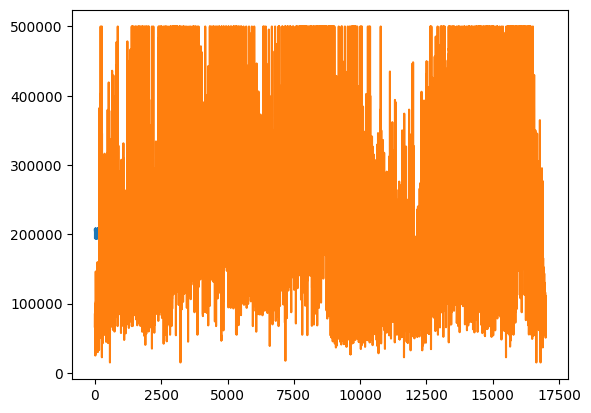

In [ ]:
predictions = model(torch.tensor(test_X.values).float()).detach().numpy()
predictions = scaler.inverse_transform(predictions)
test_y = scaler.inverse_transform(df[['median_house_value']])
plt.plot(predictions)
plt.plot(test_y)
plt.show()

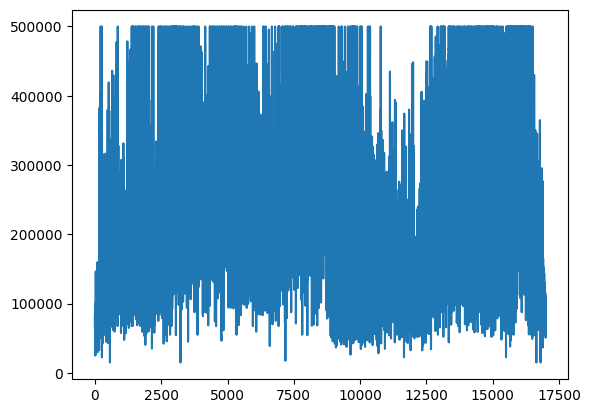

In [ ]:
plt.plot(test_y)
plt.show()

In [ ]:
#let's say we wants to buy a house that